In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
Xdata = pd.read_csv("./Logistic_X_Train.csv")
Ydata = pd.read_csv("./Logistic_Y_Train.csv")

In [5]:
Xdata.head(5)

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [6]:
Ydata.head(5)

,label
0,0
1,0
2,1
3,0
4,1


In [19]:
X = Xdata.values
Y = Ydata.values

In [20]:
X.shape

(2250, 2)

In [21]:
Y.shape

(2250, 1)

In [22]:
Y = Y.reshape(-1,)
print(Y.shape)

(2250,)


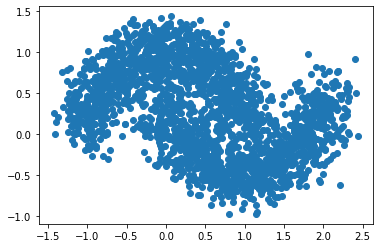

In [10]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [11]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [12]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third layer/Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
    
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the model parameters using Gradient Descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
            
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [16]:
def train(X,Y,example,epoch,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    y_oht = one_hot(Y,classes)
    
    for ix in range(epoch):
        
        Y_ = example.forward(X)
        l = loss(y_oht,Y_)
        example.backward(X,y_oht,learning_rate)
        training_loss.append(l)
        
        if(logs and ix%50==0):
            print("Epoch %d loss %.4f"%(ix,l))
            
    return training_loss

In [15]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [23]:
losses = train(X,Y,model,500,0.001)

Epoch 0 loss 0.3980
Epoch 50 loss 0.0742
Epoch 100 loss 0.0530
Epoch 150 loss 0.0533
Epoch 200 loss 0.0525
Epoch 250 loss 0.0526
Epoch 300 loss 0.0511
Epoch 350 loss 0.0502
Epoch 400 loss 0.0490
Epoch 450 loss 0.0480


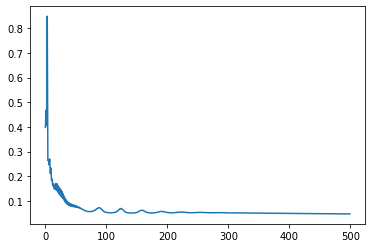

In [24]:
plt.plot(losses)

In [25]:
outputs = model.predict(X)

In [26]:
print(outputs)

[0 0 1 ... 1 1 0]


In [27]:
test_data = pd.read_csv("./Logistic_X_Test.csv")

In [28]:
Xt = test_data.values

In [29]:
Xt.shape

(750, 2)

In [30]:
model.predict(Xt)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [31]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Acc %.4f"%training_accuracy)

Training Acc 0.9671


In [32]:
Y_test = model.predict(Xt)

In [33]:
Y_test.shape

(750,)

In [34]:
Yt = pd.Series(Y_test)

In [35]:
type(Yt)

pandas.core.series.Series

In [36]:
Yt1 = pd.DataFrame(data = Yt, columns=["label"])

In [38]:
Yt1.to_csv("Yt1.csv", index=False)